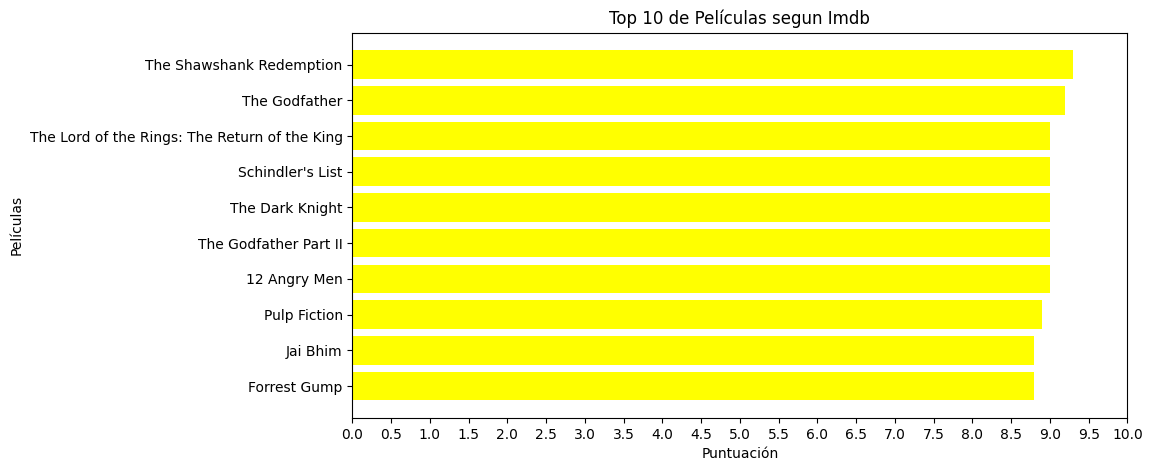

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../data/movies.csv")

df = df.sort_values(by = "rating", ascending = True).tail(10)

plt.figure(figsize=(10, 5))
plt.barh(df["name"], df["rating"], color="yellow")

plt.xticks(np.arange(0, 10.1, 0.5))

plt.xlabel("Puntuación")
plt.ylabel("Películas")
plt.title("Top 10 de Películas segun Imdb")
plt.show()